In [5]:
from datasets import load_dataset, Dataset
# from torch.utils.data import Dataset
from PIL import Image
import io
import json
import uuid
from tqdm import tqdm

In [6]:
data_paths = ['./data/RLAIF_Sample/subset1/data-00000-of-00001.arrow', 
              './data/RLAIF_Sample/subset2/data-00000-of-00001.arrow',
              './data/RLAIF_Sample/subset3/data-00000-of-00001.arrow',
              './data/RLAIF_Sample/subset1/data-00000-of-00001.arrow'
              ]
target_file = './data/RLAIF_Sample/DPO_format_for_Qwen/dpo.json'
dataset = Dataset.from_file(data_paths[0])
print(dataset[0].keys())

dict_keys(['ds_name', 'image', 'question', 'chosen', 'rejected', 'origin_dataset', 'origin_split', 'idx', 'image_path', '__index_level_0__'])


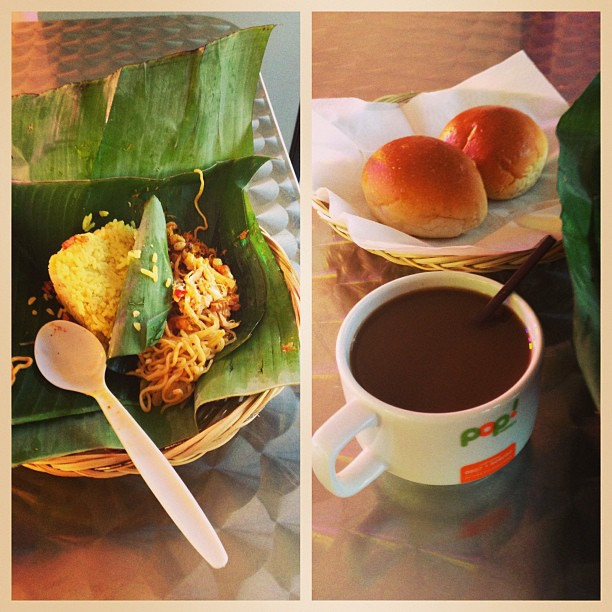

In [7]:
image_data = dataset[0]['image']['bytes']
image = Image.open(io.BytesIO(image_data))
# image.save(f"img.png")
image.show()

In [8]:
data = []

for path in tqdm(data_paths):
    subset = Dataset.from_file(path)
    for item in tqdm(subset):
        image_data= item['image']['bytes']
        item_id = str(uuid.uuid4())
        image_file = f'{item_id}.png'
        image.save(f"./data/RLAIF_Sample/DPO_format_for_Qwen/images/{item_id}.png")
        prompt = item['question']
        chosen = item['chosen']
        rejected = item['rejected']
        data.append({
               "id": item_id,
                "image": image_file,
                "prompt": '<image>\n' + prompt,
                "chosen": chosen,
                "rejected": rejected
        })

with open(target_file, 'w', encoding='utf-8') as f:
    json.dump(data, f, indent=4, ensure_ascii=False)

print(f'JSON file saved to {target_file}')

100%|██████████| 4/4 [02:23<00:00, 35.99s/it]


JSON file saved to ./data/RLAIF_Sample/DPO_format_for_Qwen/dpo.json
